<a href="https://colab.research.google.com/github/NeevSabhani/Data-Science/blob/main/Unit7/NeevSabhUnit7Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
!pip install preliz
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-b0x5nz56
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-b0x5nz56
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev22+g0184702f-py3-none-any.whl size=1262235 sha256=44b4d610774102cdde895b6e0784c3ca4aa46d44bdddfbe49f3cddadd6a0660f
  Stored in directory: /tmp/pip-ephem-wheel-cache-fmbxh51w/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━

#**Unit 7 Project: Loan Amounts**

For this project, I choose to make models that would predict Loan Amounts. I choose this idea not because of its importance (though there are some), but because I thought that doing this would be fun and I would find interesting relationships between Loan Amounts and different factors such as Credit Score.

##**Data and Casual Diagram**

###**Data**

For my data, I will be using a dataset about loans that I found on Kaggle (tried not to use kaggle, but I found this dataset interesting and I couldn't find a better one somehwere else)

In [2]:
loancsv = '/content/loan_data.csv'
loan = pd.read_csv(loancsv)
loan = loan.head(1000)
loan = loan.iloc[::20].reset_index(drop=True)
loan

#My dataset has over 45000 data points which is WAYYYY to much, so here im reducing it to a random sample size so my models can run quicker

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,25.0,male,Bachelor,195718.0,0,RENT,35000.0,VENTURE,7.49,0.18,4.0,684,Yes,0
2,26.0,male,Bachelor,75503.0,5,RENT,30000.0,MEDICAL,17.99,0.40,2.0,616,No,1
3,21.0,female,Bachelor,158338.0,0,RENT,30000.0,VENTURE,5.99,0.19,4.0,623,Yes,0
4,24.0,male,Bachelor,300951.0,2,RENT,18000.0,EDUCATION,12.98,0.06,3.0,671,No,0
5,26.0,male,Bachelor,281792.0,1,MORTGAGE,21600.0,HOMEIMPROVEMENT,12.18,0.08,3.0,584,Yes,0
6,22.0,female,Bachelor,16890.0,0,OWN,4750.0,EDUCATION,11.01,0.28,3.0,645,No,1
7,23.0,male,Bachelor,258980.0,0,MORTGAGE,35000.0,MEDICAL,14.79,0.14,3.0,618,Yes,0
8,23.0,male,High School,17859.0,0,OWN,7750.0,PERSONAL,17.04,0.43,4.0,626,No,1
9,24.0,male,Associate,80145.0,1,RENT,25000.0,EDUCATION,9.91,0.31,2.0,636,No,1


###**Casual Diagram**

####**The code**

In [ ]:
import graphviz

dot = graphviz.Digraph(format='png')

dot.node("Age", "Person Age")
dot.node("Education", "Education Level")
dot.node("Income", "Applicant Income")
dot.node("LoanIntent", "Loan Intent")
dot.node("LoanAmt", "Loan Amount")
dot.node("LoanIntRate", "Loan Interest Rate")
dot.node("LoanPctIncome", "Loan % of Income")
dot.node("CreditScore", "Credit Score")


dot.node("InterestRates", "Interest Rates")
dot.node("Inflation", "Inflation Rate")
dot.node("EconomicConditions", "Economic Conditions")
dot.node("BankPolicies", "Bank Lending Policies")
dot.node("MarketTrends", "Housing & Market Trends")


dot.edge("Age", "LoanAmt")
dot.edge("Education", "LoanAmt")
dot.edge("Income", "LoanAmt")
dot.edge("LoanIntent", "LoanAmt")
dot.edge("LoanIntRate", "LoanAmt")
dot.edge("LoanPctIncome", "LoanAmt")
dot.edge("CreditScore", "LoanAmt")


dot.edge("InterestRates", "LoanIntRate")
dot.edge("Inflation", "LoanIntRate")
dot.edge("EconomicConditions", "Income")
dot.edge("BankPolicies", "LoanIntRate")
dot.edge("MarketTrends", "LoanAmt")

dot.edge("Age", "CreditScore")
dot.edge("Age", "Income")
dot.edge("Education", "Income")
dot.edge("Income", "CreditScore")
dot.edge("CreditScore", "LoanIntRate")
dot.edge("LoanIntRate", "LoanPctIncome")



####**The resulting Casual**

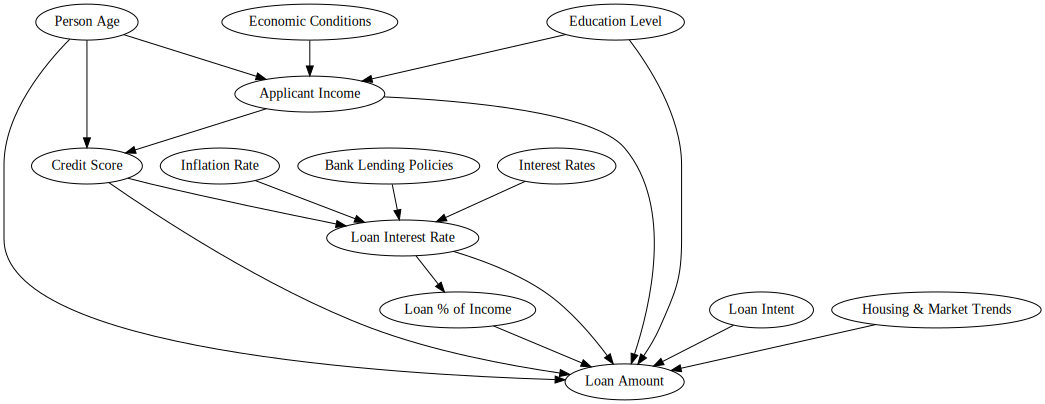

In [ ]:
dot

For my Models, I will focus in on how a persons Income, Age, and Credit score affects the loan amounts that they get. As you can see in my Casual Diagram, there are many factors, but why did I choose Income, Age, and Credit Score? Well, I believe that those 3 factors, compared to the rest, affect the Loan Amount that they get the most. While factors like Loan % of Income and Interest Rates do affect the Loan Amount, I think that the 3 factors im using affects Loan Amounts more and I would rather focus on those 3 than the other variables. As for the other factors, I either thought that they were not as important or I just did not have any data on them.

(Also, according to my casual diagram, there is interaction between those 3 factors which I wanted to find out more about)

##**My models**

For my models, I will be making 6 models:
1. Polynomial model with person income
2. Bspline with person income
3. Bspline with person income and credit score
4. Bspline with person income and person age
5. Bspline with credit score and person age
6. Bspline with all three

I chose B-splines and polynomial models over Gaussian Processes (GPs) because they are computationally more efficient, especially for large datasets like loan prediction, where GPs scale poorly (O(n³) complexity) (Wrote before I reduced my Sample size. So the time complexity would not be that much of a problem, but creating a GP is much more complicated thatn using polynomial or Bspline). B-splines capture local nonlinearity with controlled flexibility, while polynomials model (as long as you don't overfit) smooth global trends, making them well-suited for structured financial data with fixed predictors like income and credit score. GPs, while powerful, require heavy  tuning, making them less practical for this specific task .


###**Knots**


Looking at my dataset, I selected knots for credit score, income, and age based on noticeable patterns in the data that I will use throughout my models.

For income, I identified significant changes around 50k, 100k, and 200k, which correspond to common financial thresholds that may impact loan eligibility and borrowing behavior. For credit score, I observed shifts at 550, 650, and 700, which align with key breakpoints in creditworthiness—550 is often considered a poor score, 650 represents fair credit, and 700 marks the beginning of good credit. Since age had a smaller range, I chose 22 and 25 as representative points near the lower and upper bounds to capture potential variations without adding unnecessary complexity.

While I am not an expert in this area, these knots are based on patterns observed in the data and real-world financial benchmarks, making them reasonable choices for modeling.

In [10]:
cs = [550, 650, 700]
inc = [50000, 100000, 200000]
age = [22, 25]

###**Model 1**

In [45]:
model_poly = bmb.Model("loan_amnt ~ poly(person_income, degree=4)", loan, family="t")
idata_poly = model_poly.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


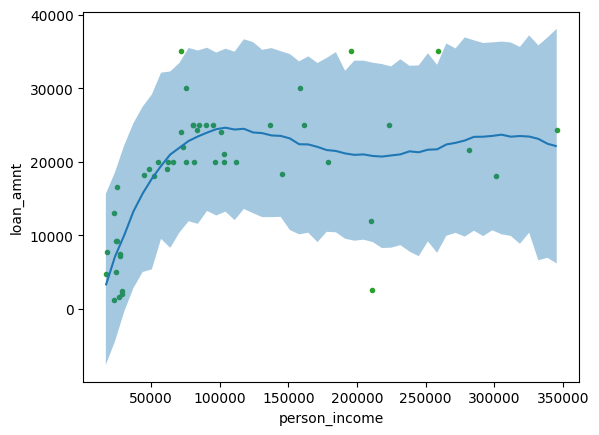

In [46]:
bmb.interpret.plot_predictions(model_poly, idata_poly, "person_income", pps=True)
plt.plot(loan.person_income, loan.loan_amnt, "C2.", zorder=-3)

###**Model 2**

In [33]:
bspline_1 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=inc)",
    loan,
    family="t"
)
idata_1 = bspline_1.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


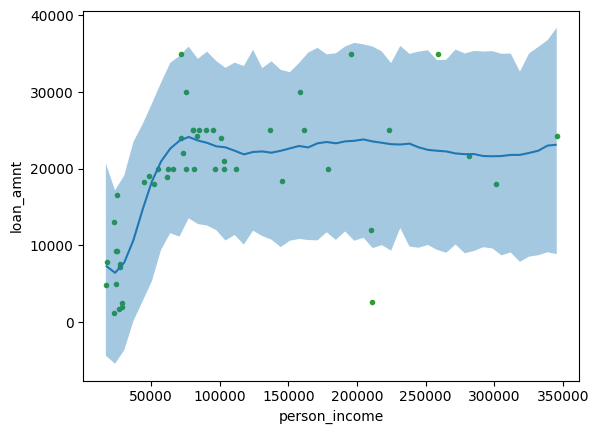

In [34]:
bmb.interpret.plot_predictions(bspline_1, idata_1, "person_income", pps=True)
plt.plot(loan.person_income, loan.loan_amnt, "C2.", zorder=-3)

###**Model 3**

In [35]:
bspline_2 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=inc) + bs(credit_score, knots=cs)",
    loan,
    family="t")
idata_2 = bspline_2.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


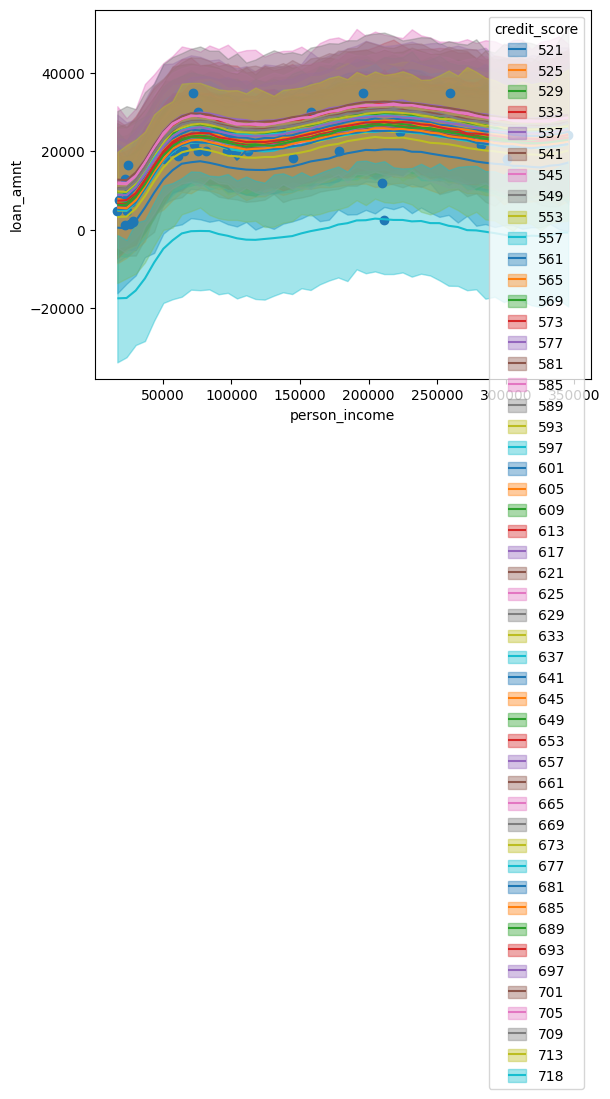

In [36]:
bmb.interpret.plot_predictions(bspline_2, idata_2, ["person_income", "credit_score"], pps=True)
plt.scatter(loan.person_income, loan.loan_amnt)
plt.show()

###**Model 4**

In [37]:
bspline_4 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=inc) + bs(person_age, knots=age)",
    loan,
    family="t")
idata_4 = bspline_4.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


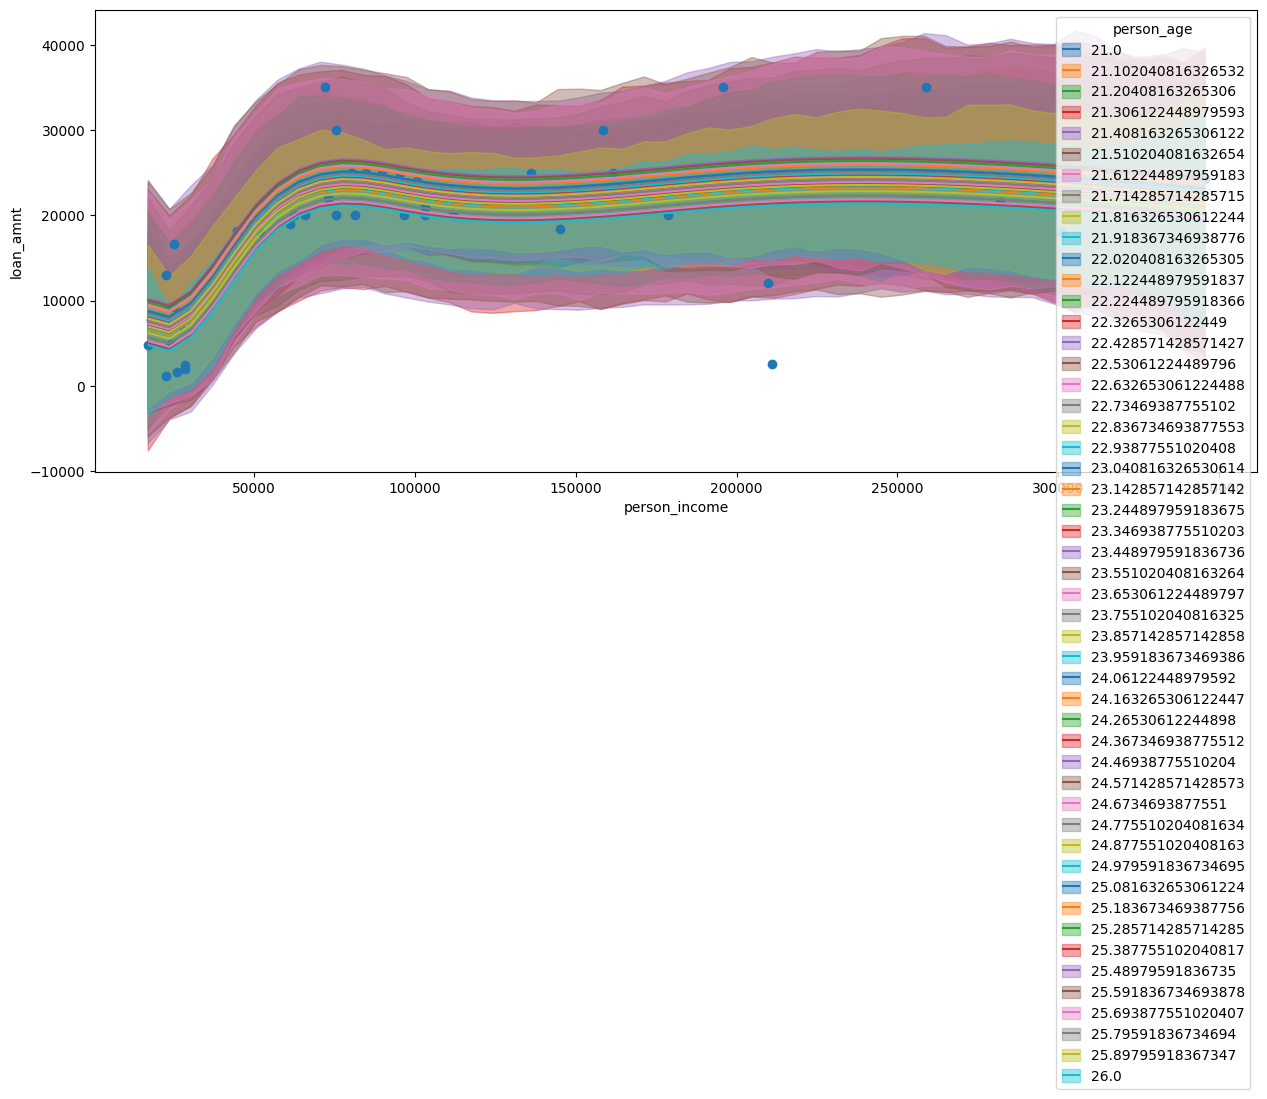

In [38]:
bmb.interpret.plot_predictions(bspline_4, idata_4, ["person_income", "person_age"], fig_kwargs={"figsize": (15, 6)})
plt.scatter(loan.person_income, loan.loan_amnt)
plt.show()

###**Model 5**

In [39]:
bspline_5 = bmb.Model(
    "loan_amnt ~ bs(credit_score, knots=cs) + bs(person_age, knots=age)",
    loan,
    family="t")
idata_5 = bspline_5.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


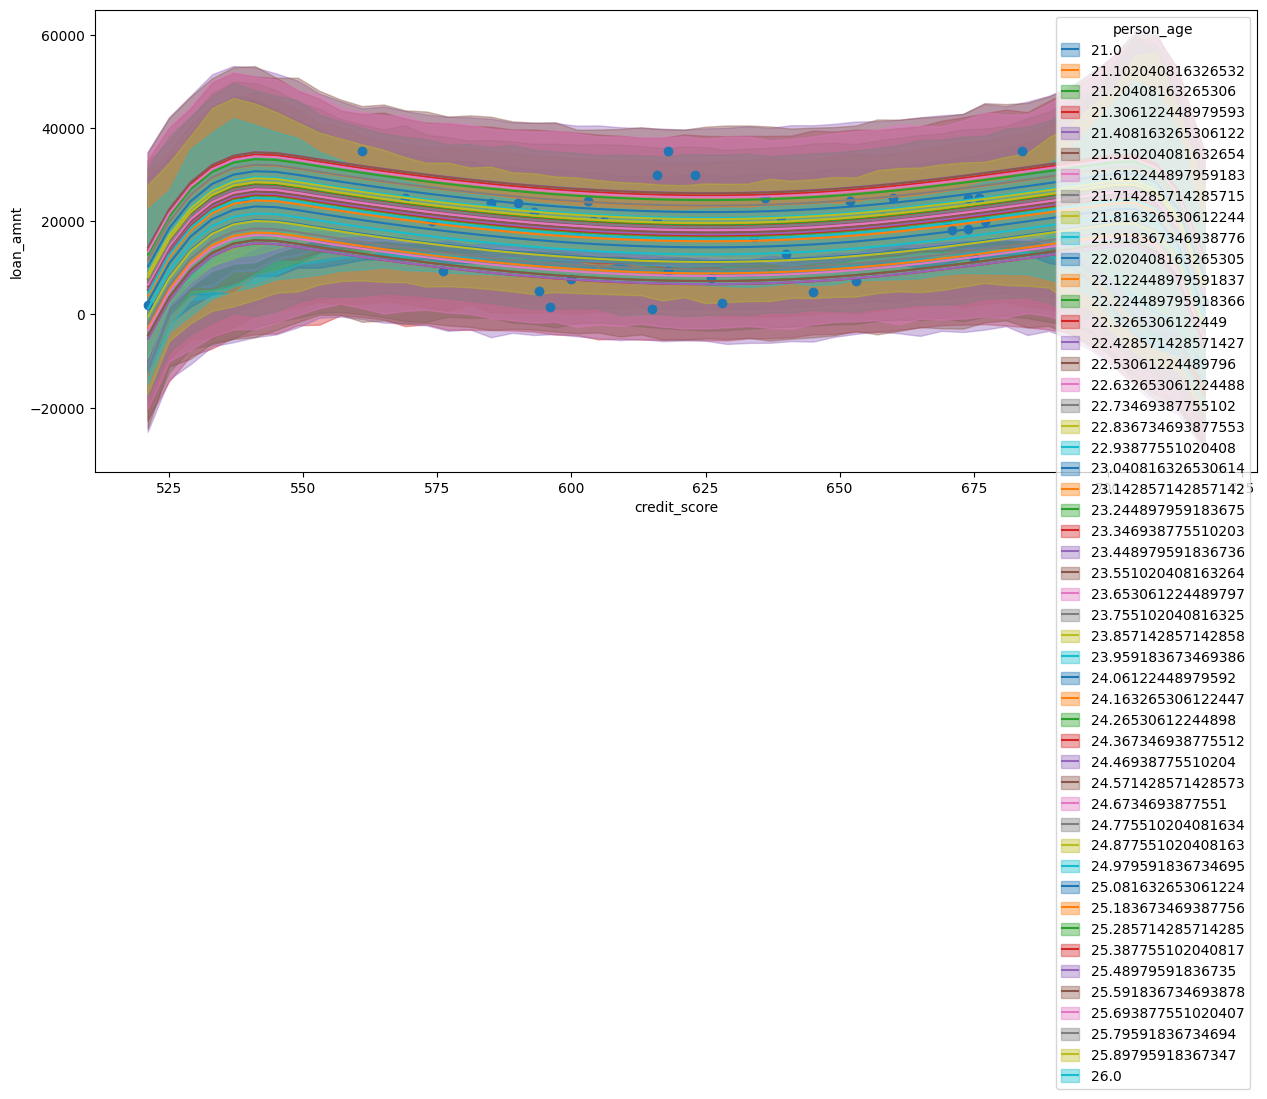

In [40]:
bmb.interpret.plot_predictions(bspline_5, idata_5, ["credit_score", "person_age"], fig_kwargs={"figsize": (15, 6)})
plt.scatter(loan.credit_score, loan.loan_amnt)
plt.show()

###**Model 6**

In [42]:
bspline_3 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=inc) + bs(credit_score, knots=cs) + bs(person_age, knots=age)",
    loan,
    family="t"
)
idata_3 = bspline_3.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


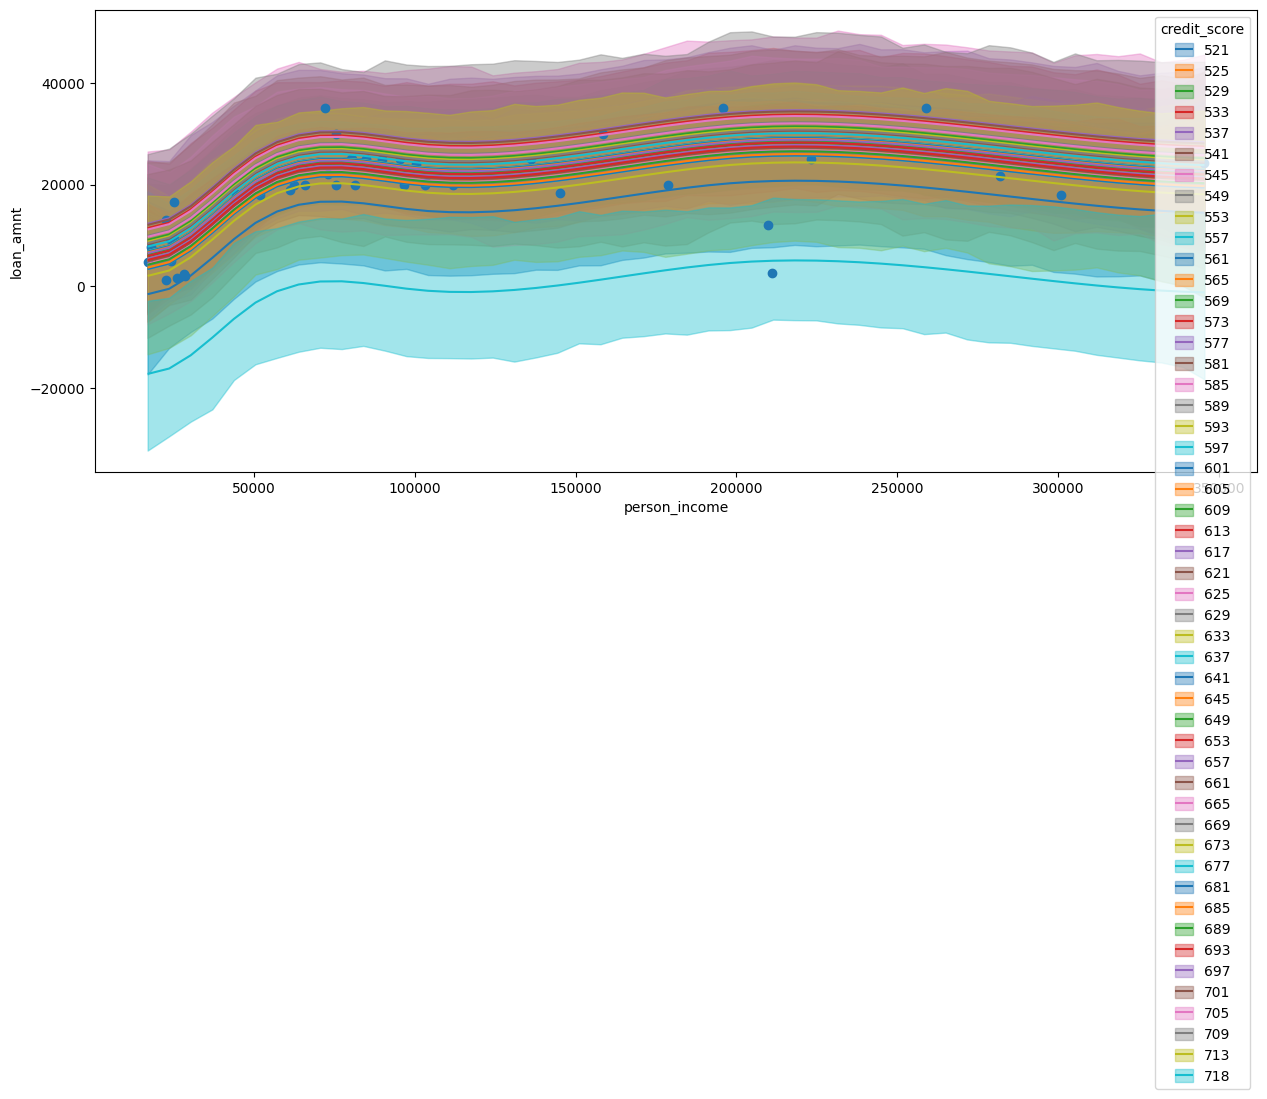

In [43]:
bmb.interpret.plot_predictions(bspline_3, idata_3, ["person_income", "credit_score"], fig_kwargs={"figsize": (15, 6)})
plt.scatter(loan.person_income, loan.loan_amnt)
plt.show()

##**Conclusion**

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

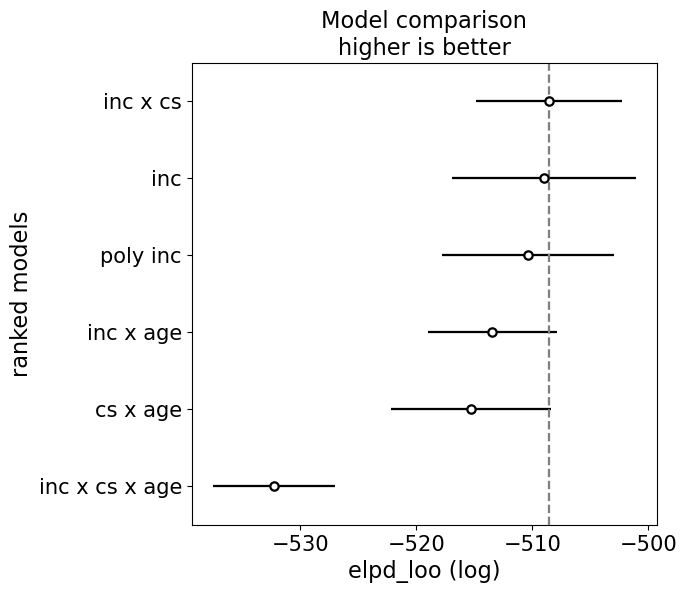

In [47]:
bd = az.compare({"inc":idata_1, "inc x cs":idata_2, "inc x age":idata_3,"cs x age":idata_4, "inc x cs x age":idata_5,  "poly inc":idata_poly})
az.plot_compare(bd)

Looking at the **ELPD LOO scores**, the **B-spline model with income and credit score** performs the best, suggesting that these two variables together provide the most predictive power for loan amounts. This makes sense since **income is a primary factor in loan decisions**, and credit score helps refine the risk assessment by capturing borrowing history. The **B-spline model with income alone** also does well, reinforcing that income is a strong standalone predictor, though adding credit score improves the predictions.  

The **B-spline models that include age** rank lower, indicating that **age does not contribute much useful information** in predicting loan amounts. The **polynomial model with income alone** is also ranked lower than the Bspline income alone, suggesting that the **added flexibility of B-splines is capturing more meaningful trends in the data**. The lowest-performing model is the **B-spline with income, credit score, and age**, which may indicate that adding too many predictors creates unnecessary complexity without improving generalization.

Overall, the results highlight that **income is the most critical predictor**, **credit score provides additional value**, and **age appears to have little impact** on loan amounts. The fact that **B-splines are ranking higher than polynomials suggests that they are effectively capturing nonlinear relationships in this dataset**.

So, the model I think that is the best is the Bspline using Income and credit score. When we look back at our casual, we see that income affects credit score which affects loan amounts, but income also directly affects loan amounts. While income alone is a strong predictor, like we saw, I think that added predictor credit score makes the model a little better than using income alone. However, even though I saw credit score and income is better than income alone, it really is a toss up and this decision is informed by my casual diagram.